In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

df = pd.read_csv("fruit_data_with_colors.txt",delimiter = "\t")
df.head()
Y = df["fruit_label"]
df.drop(['fruit_label','fruit_name','fruit_subtype'],axis=1,inplace=True)
X = df[["mass","width","height"]]


In [25]:
df.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [26]:
trainX = np.array(X[:50])
trainY = np.array(Y[:50])
testX = np.array(X[50:])
testY = np.array(Y[50:])


In [27]:
class KNN:
    def __init__(self,k = 1):
        self.k = k
        
    def euclidian_distance(self,query,X):
        difference = np.array(X) - np.array(query)
        sqrd_diff = np.square(difference)
        sum_sqrd_diff = np.sum(sqrd_diff, axis = 1)
        distance = np.sqrt(sum_sqrd_diff)
        return distance
    
    def nearest_neighbours(self,distance):
        return np.argsort(distance)[:self.k]
    
    def predict(self,query,trainX,trainY):
        ed = self.euclidian_distance(query,trainX)
        nn = self.nearest_neighbours(ed)
        labels_nn = list(trainY[nn])
        return max(labels_nn, key = labels_nn.count) 

In [28]:
K =4   #number of clusters

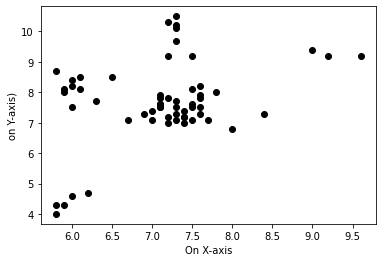

In [29]:
data = df
X = data[["height","width"]]
 #Visualise data points
plt.scatter(X["width"],X["height"],c='black')
plt.xlabel('On X-axis')
plt.ylabel('on Y-axis)')
plt.show()


In [30]:
rand = np.random.rand(4)
rand

array([0.05832399, 0.84376996, 0.81337073, 0.21779844])

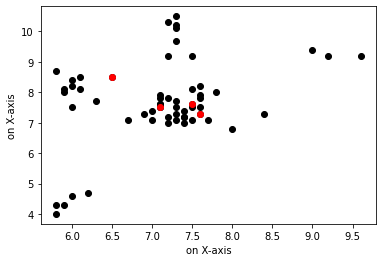

In [31]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["width"],X["height"],c='black')
plt.scatter(Centroids["width"],Centroids["height"],c='red')
plt.xlabel('on X-axis')
plt.ylabel('on X-axis')
plt.show()

In [34]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["width"]-row_d["width"])**2
            d2=(row_c["height"]-row_d["height"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["height","width"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['height'] - Centroids['height']).sum() + (Centroids_new['width'] - Centroids['width']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["height","width"]]
    
    
    


0.0


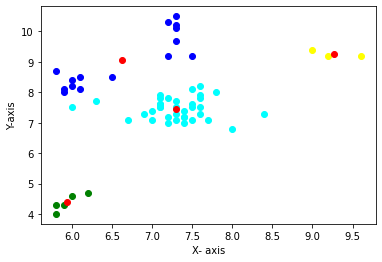

In [33]:
color=['blue','green','cyan', 'yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["width"],data["height"],c=color[k])
plt.scatter(Centroids["width"],Centroids["height"],c='red')
plt.xlabel('X- axis')
plt.ylabel('Y-axis')
plt.show()